<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_01_pandas_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



1. Leer los datos desde una página web.

In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(url, header=None)
print(df.head())



         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.

### 2. Renombrar las columnas en formato PascalCase


In [8]:
print("Columnas ANTES:")
print(df.columns.tolist())
print("Shape ANTES:", df.shape)

bases = ["Radius","Texture","Perimeter","Area","Smoothness","Compactness","Concavity","ConcavePoints","Symmetry","FractalDimension"]
suffixes = ["Mean","Se","Worst"]
features = [b+s for b in bases for s in suffixes]
cols_pascal = ["Id","Diagnosis"] + features

assert len(df.columns) == len(cols_pascal)
df.columns = cols_pascal

print("\nColumnas DESPUÉS:")
print(df.columns.tolist())
print("Shape DESPUÉS:", df.shape)



Columnas ANTES:
['Id', 'Diagnosis', 'RadiusMean', 'RadiusSe', 'RadiusWorst', 'TextureMean', 'TextureSe', 'TextureWorst', 'PerimeterMean', 'PerimeterSe', 'PerimeterWorst', 'AreaMean', 'AreaSe', 'AreaWorst', 'SmoothnessMean', 'SmoothnessSe', 'SmoothnessWorst', 'CompactnessMean', 'CompactnessSe', 'CompactnessWorst', 'ConcavityMean', 'ConcavitySe', 'ConcavityWorst', 'ConcavePointsMean', 'ConcavePointsSe', 'ConcavePointsWorst', 'SymmetryMean', 'SymmetrySe', 'SymmetryWorst', 'FractalDimensionMean', 'FractalDimensionSe', 'FractalDimensionWorst']
Shape ANTES: (569, 32)

Columnas DESPUÉS:
['Id', 'Diagnosis', 'RadiusMean', 'RadiusSe', 'RadiusWorst', 'TextureMean', 'TextureSe', 'TextureWorst', 'PerimeterMean', 'PerimeterSe', 'PerimeterWorst', 'AreaMean', 'AreaSe', 'AreaWorst', 'SmoothnessMean', 'SmoothnessSe', 'SmoothnessWorst', 'CompactnessMean', 'CompactnessSe', 'CompactnessWorst', 'ConcavityMean', 'ConcavitySe', 'ConcavityWorst', 'ConcavePointsMean', 'ConcavePointsSe', 'ConcavePointsWorst', 'S

### 3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el DataFrame


In [9]:
display(df.head())
display(df.tail())
display(df.describe())
df.info()


,Id,Diagnosis,RadiusMean,RadiusSe,RadiusWorst,TextureMean,TextureSe,TextureWorst,PerimeterMean,PerimeterSe,...,ConcavityWorst,ConcavePointsMean,ConcavePointsSe,ConcavePointsWorst,SymmetryMean,SymmetrySe,SymmetryWorst,FractalDimensionMean,FractalDimensionSe,FractalDimensionWorst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,Id,Diagnosis,RadiusMean,RadiusSe,RadiusWorst,TextureMean,TextureSe,TextureWorst,PerimeterMean,PerimeterSe,...,ConcavityWorst,ConcavePointsMean,ConcavePointsSe,ConcavePointsWorst,SymmetryMean,SymmetrySe,SymmetryWorst,FractalDimensionMean,FractalDimensionSe,FractalDimensionWorst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


,Id,RadiusMean,RadiusSe,RadiusWorst,TextureMean,TextureSe,TextureWorst,PerimeterMean,PerimeterSe,PerimeterWorst,...,ConcavityWorst,ConcavePointsMean,ConcavePointsSe,ConcavePointsWorst,SymmetryMean,SymmetrySe,SymmetryWorst,FractalDimensionMean,FractalDimensionSe,FractalDimensionWorst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     569 non-null    int64  
 1   Diagnosis              569 non-null    object 
 2   RadiusMean             569 non-null    float64
 3   RadiusSe               569 non-null    float64
 4   RadiusWorst            569 non-null    float64
 5   TextureMean            569 non-null    float64
 6   TextureSe              569 non-null    float64
 7   TextureWorst           569 non-null    float64
 8   PerimeterMean          569 non-null    float64
 9   PerimeterSe            569 non-null    float64
 10  PerimeterWorst         569 non-null    float64
 11  AreaMean               569 non-null    float64
 12  AreaSe                 569 non-null    float64
 13  AreaWorst              569 non-null    float64
 14  SmoothnessMean         569 non-null    float64
 15  Smooth

### 4. Contabilizar la cantidad de valores nulos en el DataFrame y proponer una estrategia de reemplazo


In [10]:
df.isna().sum()


,0
Id,0
Diagnosis,0
RadiusMean,0
RadiusSe,0
RadiusWorst,0
TextureMean,0
TextureSe,0
TextureWorst,0
PerimeterMean,0
PerimeterSe,0


### 5. Identificar los valores únicos en la columna `Diagnosis` que representan las etiquetas B y M


In [12]:
valores = df["Diagnosis"].unique()
print("Valores únicos en Diagnosis:", valores)
print("Interpretación:")
print(" - M = Maligno")
print(" - B = Benigno")


Valores únicos en Diagnosis: ['M' 'B']
Interpretación:
 - M = Maligno
 - B = Benigno


### 6. Realizar un conteo de los casos etiquetados como B y M utilizando seaborn con countplot


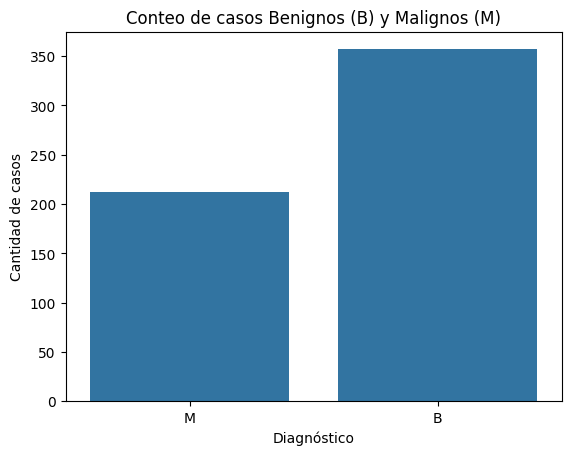

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Diagnosis", data=df)
plt.title("Conteo de casos Benignos (B) y Malignos (M)")
plt.xlabel("Diagnóstico")
plt.ylabel("Cantidad de casos")
plt.show()


### 7. Agregar una nueva columna llamada `DiagnosisNumeric` donde B = 0 y M = 1


In [14]:
df["DiagnosisNumeric"] = df["Diagnosis"].map({"B": 0, "M": 1})
df[["Diagnosis", "DiagnosisNumeric"]].head()


,Diagnosis,DiagnosisNumeric
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1


### 8. Normalizar cada columna respecto a su media y desviación estándar usando z-score


In [15]:
num_cols = df.select_dtypes(include=[np.number]).columns
scale_cols = [c for c in num_cols if c not in ["Id","DiagnosisNumeric"]]

df_norm = df.copy()
df_norm[scale_cols] = df_norm[scale_cols].apply(lambda x: (x - x.mean()) / x.std(ddof=0))
df_norm[scale_cols].describe().round(2)


,RadiusMean,RadiusSe,RadiusWorst,TextureMean,TextureSe,TextureWorst,PerimeterMean,PerimeterSe,PerimeterWorst,AreaMean,...,ConcavityWorst,ConcavePointsMean,ConcavePointsSe,ConcavePointsWorst,SymmetryMean,SymmetrySe,SymmetryWorst,FractalDimensionMean,FractalDimensionSe,FractalDimensionWorst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,...,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.03,-2.23,-1.98,-1.45,-3.11,-1.61,-1.11,-1.26,-2.74,-1.82,...,-1.73,-2.22,-1.69,-1.22,-2.68,-1.44,-1.31,-1.75,-2.16,-1.60
25%,-0.69,-0.73,-0.69,-0.67,-0.71,-0.75,-0.74,-0.74,-0.70,-0.72,...,-0.67,-0.75,-0.69,-0.64,-0.69,-0.68,-0.76,-0.76,-0.64,-0.69
50%,-0.22,-0.10,-0.24,-0.30,-0.03,-0.22,-0.34,-0.40,-0.07,-0.18,...,-0.27,-0.04,-0.29,-0.34,-0.05,-0.27,-0.22,-0.22,-0.13,-0.22
75%,0.47,0.58,0.50,0.36,0.64,0.49,0.53,0.65,0.53,0.47,...,0.52,0.66,0.54,0.36,0.60,0.54,0.53,0.71,0.45,0.45
max,3.97,4.65,3.98,5.25,4.77,4.57,4.24,3.93,4.48,4.91,...,4.09,3.89,4.29,5.93,3.96,5.11,4.70,2.69,6.05,6.85


### 9. Agrupar características similares por prefijo y calcular su promedio


In [16]:
import re

group_means = {}
for prefix in ["Radius","Texture","Perimeter","Area","Smoothness","Compactness","Concavity","ConcavePoints","Symmetry","FractalDimension"]:
    cols_pref = [c for c in df.columns if re.match(rf"^{prefix}(Mean|Se|Worst)$", c)]
    group_means[prefix + "Avg"] = df[cols_pref].mean(axis=1)

df_groups = pd.DataFrame(group_means)
df_groups.head()


,RadiusAvg,TextureAvg,PerimeterAvg,AreaAvg,SmoothnessAvg,CompactnessAvg,ConcavityAvg,ConcavePointsAvg,SymmetryAvg,FractalDimensionAvg
0,50.390000,333.798667,0.229700,0.693003,53.998466,0.039547,8.472074,740.310000,0.513233,0.281467
1,57.080000,442.054460,0.112757,0.444690,25.827742,0.015027,8.335807,712.736667,0.184000,0.183340
2,56.980000,401.089833,0.177400,0.530830,32.873717,0.032987,7.865690,629.010000,0.339767,0.230627
3,36.460000,128.842133,0.202100,0.583013,10.228037,0.049953,4.992946,231.023333,0.587667,0.364767
4,56.576667,432.411033,0.161067,0.532443,33.296497,0.033447,7.520892,581.290000,0.247467,0.158560


### 10. Crear un histograma de la columna `RadiusMean` separado por las etiquetas B y M


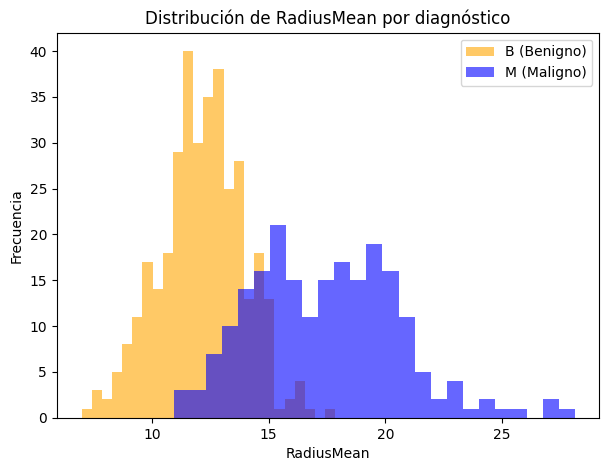

In [17]:
b_vals = df.loc[df["Diagnosis"]=="B", "RadiusMean"]
m_vals = df.loc[df["Diagnosis"]=="M", "RadiusMean"]

plt.figure(figsize=(7,5))
plt.hist(b_vals, bins=25, alpha=0.6, color="orange", label="B (Benigno)")
plt.hist(m_vals, bins=25, alpha=0.6, color="blue", label="M (Maligno)")
plt.xlabel("RadiusMean")
plt.ylabel("Frecuencia")
plt.title("Distribución de RadiusMean por diagnóstico")
plt.legend()
plt.show()


### 11. Generar gráficos de violín para múltiples características comparando B y M


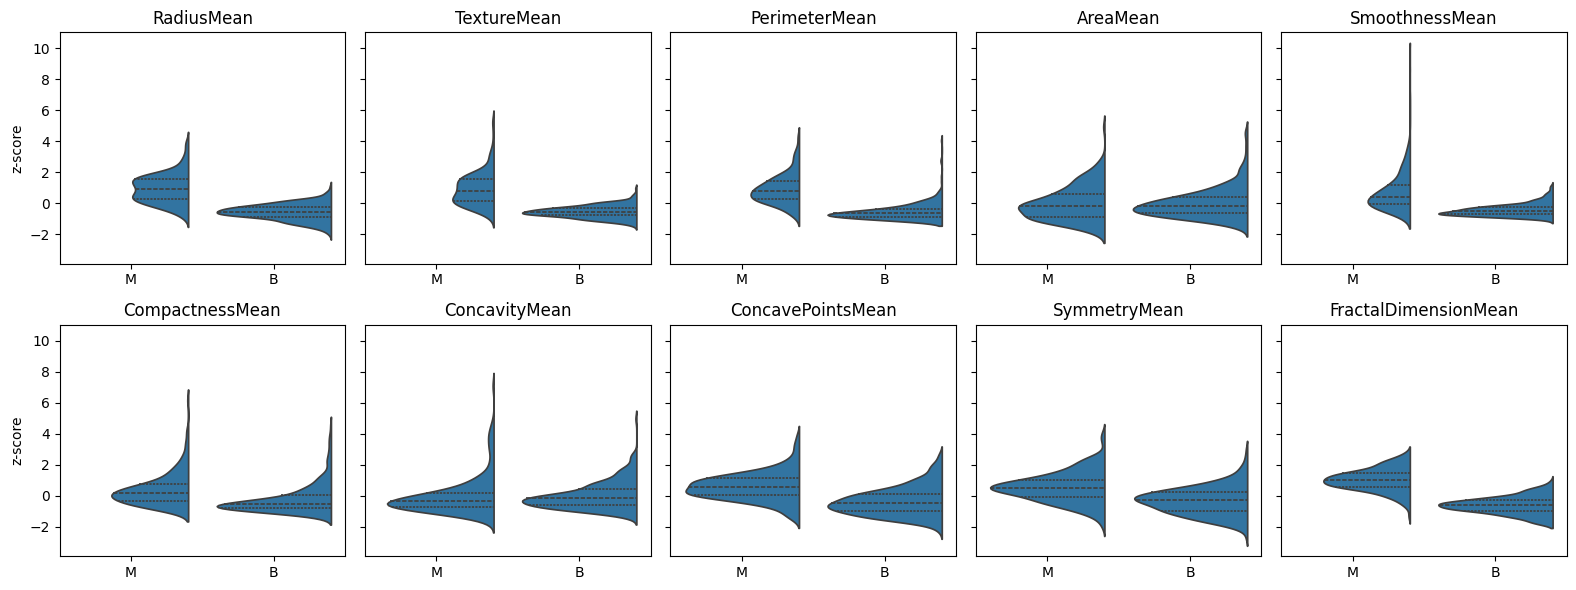

In [19]:
feat_violin = [
    "RadiusMean","TextureMean","PerimeterMean","AreaMean",
    "SmoothnessMean","CompactnessMean","ConcavityMean","ConcavePointsMean",
    "SymmetryMean","FractalDimensionMean"
]

df_std = df.copy()
for c in feat_violin:
    df_std[c] = (df_std[c] - df_std[c].mean()) / df_std[c].std(ddof=0)

melted = pd.melt(df_std[["Diagnosis"] + feat_violin], id_vars="Diagnosis", var_name="Feature", value_name="Value")

fig, axes = plt.subplots(2, 5, figsize=(16,6), sharey=True)
axes = axes.ravel()
for i, col in enumerate(feat_violin):
    ax = axes[i]
    sns.violinplot(x="Diagnosis", y="Value", data=melted[melted["Feature"]==col], split=True, inner="quart", ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("z-score" if i%5==0 else "")
plt.tight_layout()
plt.show()


### 12. Determinar y eliminar los valores atípicos (outliers) en la columna `RadiusMean`


<Figure size 1000x400 with 0 Axes>

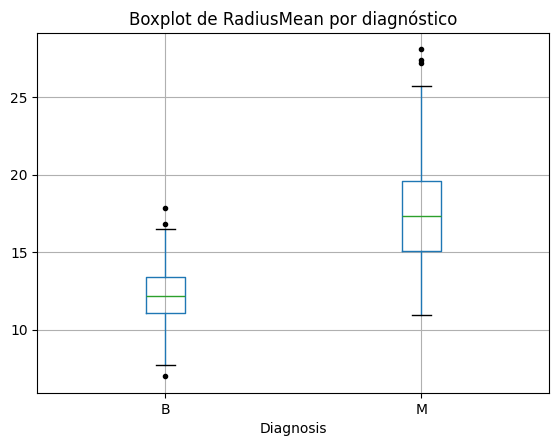

Shape original: (569, 33)
Shape sin outliers en RadiusMean: (555, 33)


In [20]:
plt.figure(figsize=(10,4))
df.boxplot(column="RadiusMean", by="Diagnosis", sym="k.")
plt.suptitle("")
plt.title("Boxplot de RadiusMean por diagnóstico")
plt.show()

Q1 = df["RadiusMean"].quantile(0.25)
Q3 = df["RadiusMean"].quantile(0.75)
IQR = Q3 - Q1
low, up = Q1 - 1.5*IQR, Q3 + 1.5*IQR

df_no_out = df[(df["RadiusMean"] >= low) & (df["RadiusMean"] <= up)]
print("Shape original:", df.shape)
print("Shape sin outliers en RadiusMean:", df_no_out.shape)


### 13. Encontrar la matriz de correlación y graficarla con un heatmap


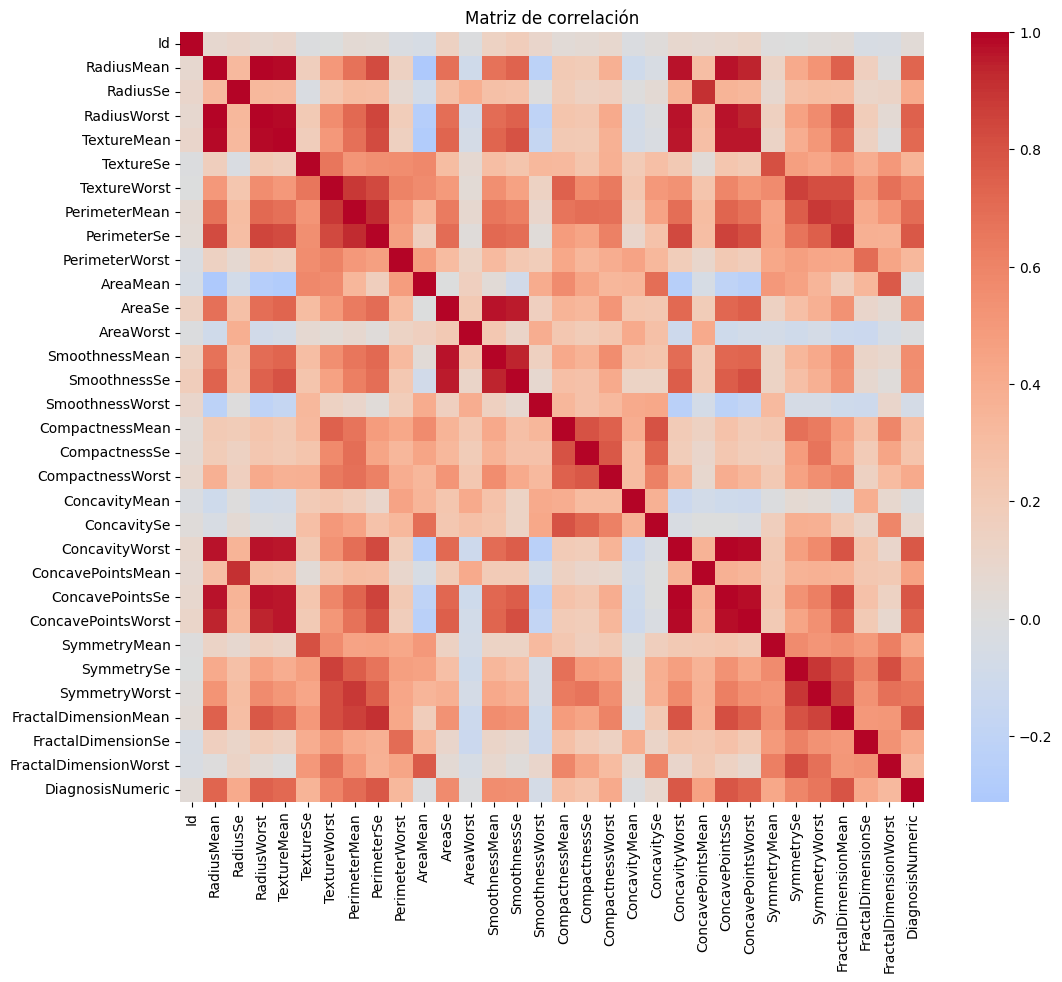

In [21]:
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()


### 14. Otros tipos de gráficos útiles para entender mejor los datos


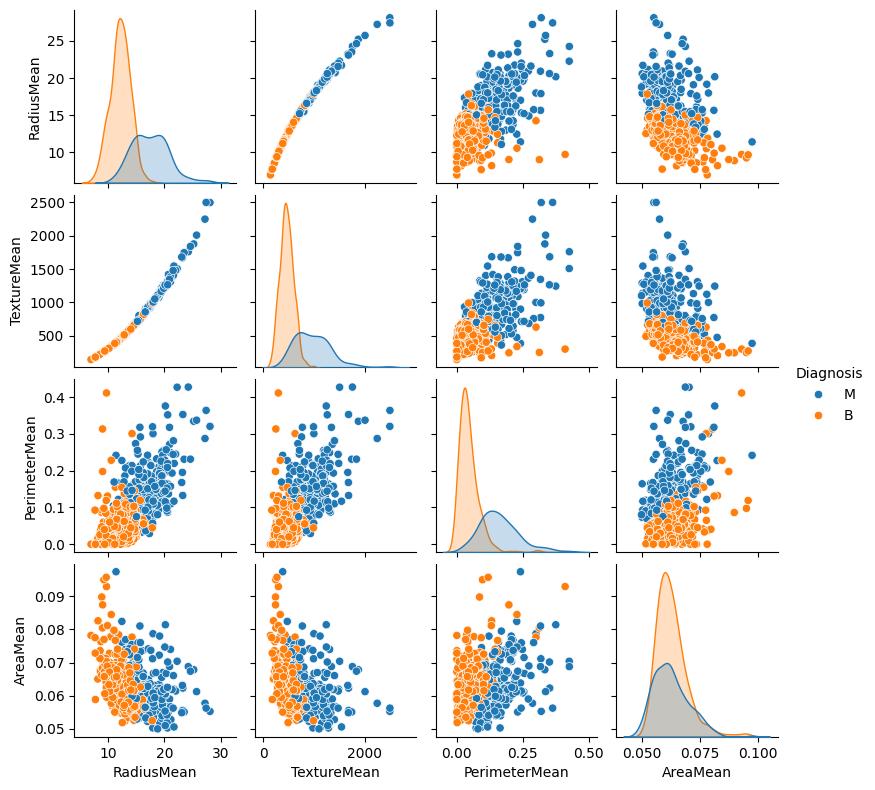

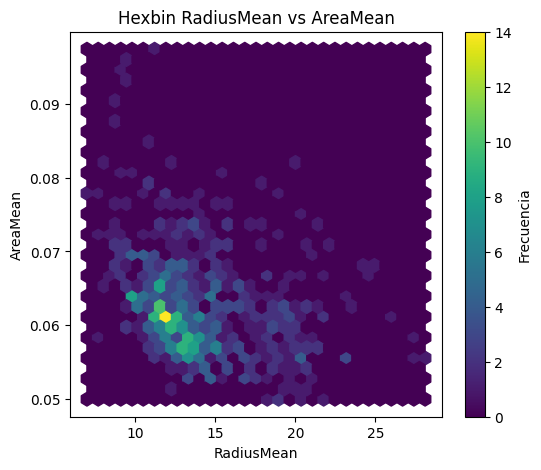

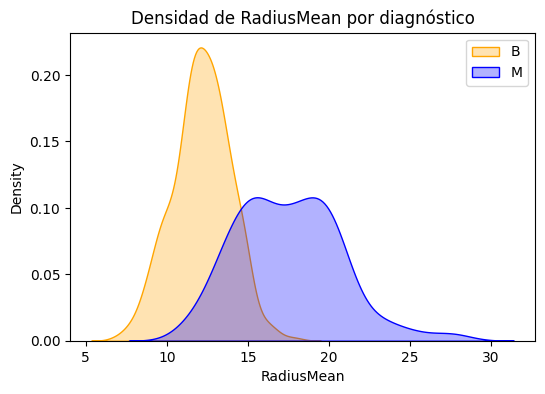

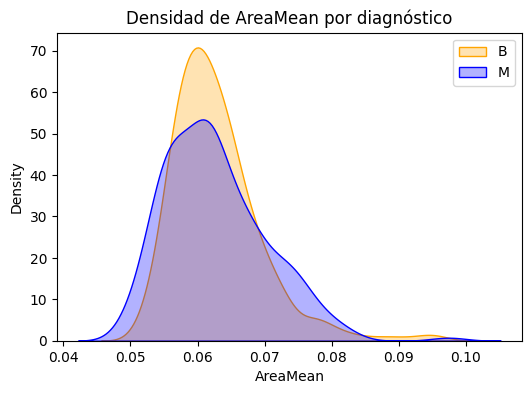

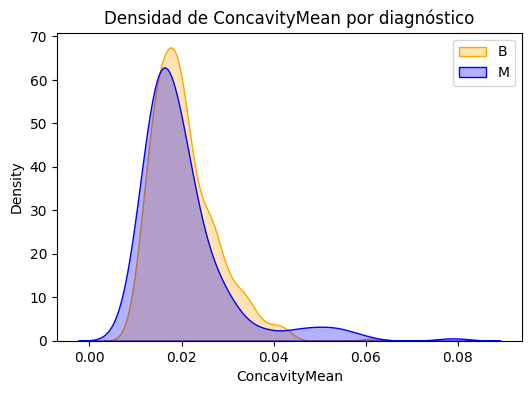

In [22]:
sns.pairplot(df[["Diagnosis","RadiusMean","TextureMean","PerimeterMean","AreaMean"]], hue="Diagnosis", diag_kind="kde", height=2)
plt.show()

plt.figure(figsize=(6,5))
plt.hexbin(df["RadiusMean"], df["AreaMean"], gridsize=30, cmap="viridis")
plt.xlabel("RadiusMean")
plt.ylabel("AreaMean")
plt.title("Hexbin RadiusMean vs AreaMean")
plt.colorbar(label="Frecuencia")
plt.show()

for col in ["RadiusMean","AreaMean","ConcavityMean"]:
    plt.figure(figsize=(6,4))
    for d,c in [("B","orange"),("M","blue")]:
        sns.kdeplot(df.loc[df["Diagnosis"]==d, col], fill=True, alpha=0.3, label=d, color=c)
    plt.title(f"Densidad de {col} por diagnóstico")
    plt.legend()
    plt.show()
